https://www.kaggle.com/datasets/NUFORC/ufo-sightings?resource=download

In [ ]:
# goals: what time do sightings most occur?
# what part of US do they most occur? --> use lat/long to plot a heat map? Can also do by state
# what year had most occurrences?
# do sightings correlate with population?
# heatmap of sightings
# plot lat/long and air traffic lines?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta, date
import matplotlib
from pandas import Series, DataFrame

In [2]:
data = pd.read_csv('./Data/complete.csv', on_bad_lines='skip') # csv had some bad data, had to skip

data = data.drop('Unnamed: 11', axis=1)

# convert datetime to datetime object
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')

# drop coerced values
data['datetime'].dropna()

# # split datetime into date and time columns
data['date'] = data['datetime'].dt.date
data['time'] = data['datetime'].dt.time

data.head()

/var/folders/ll/77znv_6d7jng9_kjkpdllhbh0000gn/T/ipykernel_903/3788192753.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./Data/complete.csv', on_bad_lines='skip') # csv had some bad data, had to skip


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/04,29.8830556,-97.941111,1949-10-10,20:30:00
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/05,29.38421,-98.581082,1949-10-10,21:00:00
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/08,53.2,-2.916667,1955-10-10,17:00:00
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/04,28.9783333,-96.645833,1956-10-10,21:00:00
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/04,21.4180556,-157.803611,1960-10-10,20:00:00


In [3]:
# any errors in dates/times?
data.isnull().sum()

datetime                    0
city                      196
state                    7519
country                 12561
shape                    3118
duration (seconds)          2
duration (hours/min)     3103
comments                  126
date posted                 0
latitude                    0
longitude                   0
date                        0
time                        0
dtype: int64

## Question 1: What time do sightings most occur?

In [113]:
data.dtypes

data['datetime'].groupby(data['datetime'].dt.hour).count()

datetime
0      5877
1      3590
2      2626
3      2222
4      1696
5      1740
6      1330
7      1035
8       920
9      1098
10     1333
11     1312
12     1606
13     1507
14     1484
15     1599
16     1814
17     2818
18     4379
19     6665
20     9326
21    12314
22    11766
23     8818
Name: datetime, dtype: int64

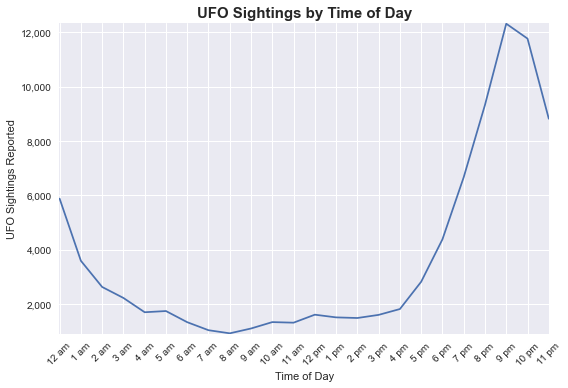

In [12]:
plt.style.use('seaborn')

# data
inputs = data['datetime'].groupby(data['datetime'].dt.hour).count()

# create plot
fig, ax = plt.subplots(1, 1)

ax.plot(inputs)

# add all x axis labels
x_labels = ['12 am','1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am', '8 am', '9 am', '10 am', '11 am',
           '12 pm', '1 pm', '2 pm', '3 pm', '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm', '11 pm']

ax.set_xticks(np.arange(len(inputs)), labels=x_labels, rotation=45)

# comma-separated axis labels
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# title, axis labels
plt.title('UFO Sightings by Time of Day', fontweight='bold', fontsize=15)
ax.set_xlabel('Time of Day')
ax.set_ylabel('UFO Sightings Reported')

plt.margins(0.001)
plt.tight_layout()
plt.show()

## Question 2: What part of the US do sightings most occur?

### By state:

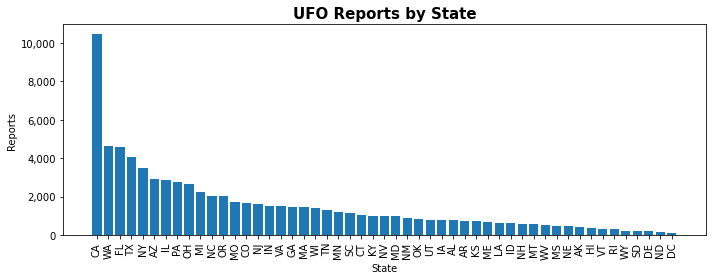

In [35]:
# null 'state' values appear to be European cities/countries
data[data['state'].isnull()]

# remove nulls from 'state'
data['state'] = data['state'].dropna()

# create states dataframe from states and counts
df_states = DataFrame(data['state'].value_counts())
df_states.reset_index(inplace=True)
df_states.rename(columns={'state': 'reports', 'index': 'state'}, inplace=True)

# remove Canadian provinces using list of states (including DC)
list_of_states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
    
df_states['state'] = df_states['state'].str.upper() # convert column to uppercase
df_states = df_states[df_states['state'].isin(list_of_states)]

# plot
reports = df_states['reports']
states = df_states['state']

fig2, ax2 = plt.subplots(1, 1, figsize=(10,4))

ax2.bar(states, reports)

ax2.set_xticks(np.arange(len(states)), labels=df_states['state'],rotation=90)

# comma-separated axis labels
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('UFO Reports by State', fontweight='bold', fontsize=15)
plt.xlabel('State')
plt.ylabel('Reports')

plt.tight_layout()
plt.show()

## Question 3: Plot of years vs. number of sightings

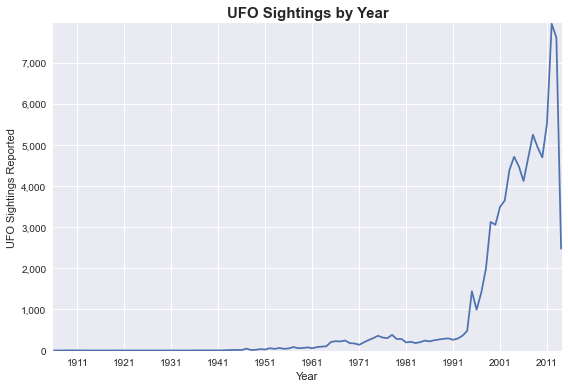

In [12]:
plt.style.use('seaborn')

# data
inputs = data['datetime'].groupby(data['datetime'].dt.year).count()

# create plot
fig3, ax3 = plt.subplots(1, 1)

ax3.plot(inputs)

# set x axis interval
plt.xticks(np.arange(min(inputs), max(inputs), 10))
# check this: https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-the-x-or-y-axis

# comma-separated axis labels
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# title, axis labels
plt.title('UFO Sightings by Year', fontweight='bold', fontsize=15)
ax3.set_xlabel('Year')
ax3.set_ylabel('UFO Sightings Reported')

plt.margins(0.001)
plt.tight_layout()
plt.show()